In [1]:
# EDA PACKAGES
import pandas as pd
import numpy as np

In [2]:
# DATA VISUALISATION PACKAGES
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ML Packages
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, hamming_loss, classification_report
from sklearn import metrics

In [4]:
# Split dataset and feature engineering: Built features from our text
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
#ML packages for Multilabel classification
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

In [6]:
# Cleaning of text
import neattext as nt
import neattext.functions as nfx

In [7]:
import re
import spacy

In [8]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [9]:


# SENTIMENT ANALYSIS


In [10]:
df = pd.read_excel ("/Users/sourabh/Desktop/graduation/EECS 5327/Project/Sentimental_train.xlsx")
df.head()


,Review,Feedback
0,There is no service for our location,0
1,Keeps on crashing 😡 Tried on all devices... .....,0
2,toooo much Netwrk issue,0
3,Barely functional. The app lacks fluidity.,0
4,Good,1


In [11]:
# removing emoticons,symbols, flags, etc.,
emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    
df['Review_new'] = df['Review'].apply(lambda x: emoji_pattern.sub(r'', str(x))) 
df.head()

,Review,Feedback,Review_new
0,There is no service for our location,0,There is no service for our location
1,Keeps on crashing 😡 Tried on all devices... .....,0,Keeps on crashing Tried on all devices... ..u...
2,toooo much Netwrk issue,0,toooo much Netwrk issue
3,Barely functional. The app lacks fluidity.,0,Barely functional. The app lacks fluidity.
4,Good,1,Good


/Users/sourabh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


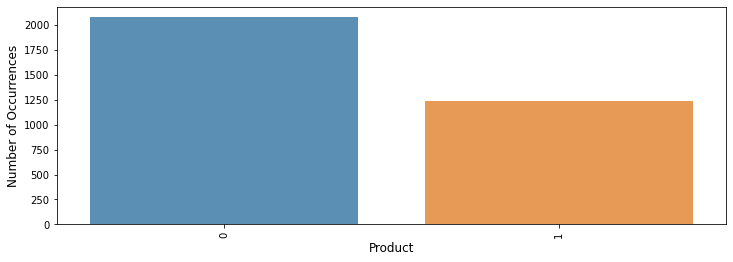

In [12]:
# Visualising the data
cnt_pro = df['Feedback'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [13]:
punctuations = string.punctuation
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
parser = English()
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    return mytokens

In [14]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}


In [15]:
# function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [16]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,2))
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [17]:
X = df['Review_new'] # the features we want to analyze
ylabels = df['Feedback'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [18]:
#using Logistic Regression
classifier = LogisticRegression(solver='lbfgs', max_iter=400)

# Create pipeline using Bag of Words
pipeLR = Pipeline([("cleaner", predictors()),
                 ('vectorizer', CountVectorizer(stop_words=None)),
                 ('classifier', classifier)])

# model generation
pipeLR.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7fba3a7739a0>),
                ('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression(max_iter=400))])

In [19]:
y_hats_train = pipeLR.predict(X_train)
print("Training set:")
print("    ")     
print("Logistic Regression Training Accuracy:",metrics.accuracy_score(y_train, y_hats_train))
print("Logistic Regression Training Precision:",metrics.precision_score(y_train, y_hats_train,average='weighted'))
print("Logistic Regression Training Recall:",metrics.recall_score(y_train, y_hats_train,average='weighted'))
print("Logistic Regression Training F1 score:",metrics.f1_score(y_train, y_hats_train,average='weighted'))
y_hats_test = pipeLR.predict(X_test)

# Model Accuracy
print("    ")  
print("Test set:")
print("    ")  
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, y_hats_test))
print("Logistic Regression Precision:",metrics.precision_score(y_test, y_hats_test,average='weighted'))
print("Logistic Regression Recall:",metrics.recall_score(y_test, y_hats_test,average='weighted'))
print("Logistic Regression F1 score:",metrics.f1_score(y_test, y_hats_test,average='weighted'))

Training set:
    
Logistic Regression Training Accuracy: 0.9883570504527813
Logistic Regression Training Precision: 0.9884124832493248
Logistic Regression Training Recall: 0.9883570504527813
Logistic Regression Training F1 score: 0.9883689648905283
    
Test set:
    
Logistic Regression Accuracy: 0.9577464788732394
Logistic Regression Precision: 0.9579572686523015
Logistic Regression Recall: 0.9577464788732394
Logistic Regression F1 score: 0.9578149584155696


In [20]:
#Using Decision Tree Classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=42)

pipeDT = Pipeline([
    ("cleaner", predictors()),
    ('vectorizer', CountVectorizer(stop_words=None)),
    ('classifier', classifier)
])

pipeDT.fit(X_train, y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7fba3b7ea880>),
                ('vectorizer', CountVectorizer()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [21]:
y_hats_train = pipeDT.predict(X_train)
print("Training set:")
print("    ") 
print("Decision Tree Training Accuracy:",metrics.accuracy_score(y_train, y_hats_train))
print("Decision Tree Training Precision:",metrics.precision_score(y_train, y_hats_train,average='weighted'))
print("Decision Tree Training Recall:",metrics.recall_score(y_train, y_hats_train,average='weighted'))
print("Decision Tree Training F1 score:",metrics.f1_score(y_train, y_hats_train,average='weighted'))
y_hats = pipeDT.predict(X_test)

# Model Accuracy
print("    ") 
print("Test set:")
print("    ") 
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_hats))
print("Decision Tree Precision:",metrics.precision_score(y_test, y_hats,average='weighted'))
print("Decision Tree Recall:",metrics.recall_score(y_test, y_hats,average='weighted'))
print("Decision Tree F1 score:",metrics.f1_score(y_test, y_hats,average='weighted'))

Training set:
    
Decision Tree Training Accuracy: 0.8861578266494179
Decision Tree Training Precision: 0.9029571848687379
Decision Tree Training Recall: 0.8861578266494179
Decision Tree Training F1 score: 0.8808114952232637
    
Test set:
    
Decision Tree Accuracy: 0.869215291750503
Decision Tree Precision: 0.8815636873364209
Decision Tree Recall: 0.869215291750503
Decision Tree F1 score: 0.8633593784806596


In [22]:
# Using Multinomial Naive Bayes
classifier = MultinomialNB(alpha=0.1)

pipeNB = Pipeline([
    ("cleaner", predictors()),
    ('vectorizer', CountVectorizer(stop_words=None)),
    ('classifier', classifier)
])

pipeNB.fit(X_train, y_train)



Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7fba3b7b7a60>),
                ('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB(alpha=0.1))])

In [23]:
y_hats_train = pipeNB.predict(X_train)
print("Training set:")
print("    ") 
print("Naive Bayes Training Accuracy:",metrics.accuracy_score(y_train, y_hats_train))
print("Naive Bayes Training Precision:",metrics.precision_score(y_train, y_hats_train,average='weighted'))
print("Naive Bayes Training Recall:",metrics.recall_score(y_train, y_hats_train,average='weighted'))
print("Naive Bayes Training F1 score:",metrics.f1_score(y_train, y_hats_train,average='weighted'))
y_hats = pipeNB.predict(X_test)

# Model Accuracy
print("    ") 
print("Test set:")
print("    ") 
print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test, y_hats))
print("Naive Bayes Precision:",metrics.precision_score(y_test, y_hats,average='weighted'))
print("Naive Bayes Recall:",metrics.recall_score(y_test, y_hats,average='weighted'))
print("Naive Bayes F1 score:",metrics.f1_score(y_test, y_hats,average='weighted'))

Training set:
    
Naive Bayes Training Accuracy: 0.9754204398447607
Naive Bayes Training Precision: 0.9758967986887286
Naive Bayes Training Recall: 0.9754204398447607
Naive Bayes Training F1 score: 0.9754983154677493
    
Test set:
    
Naive Bayes Accuracy: 0.954728370221328
Naive Bayes Precision: 0.9546515970057218
Naive Bayes Recall: 0.954728370221328
Naive Bayes F1 score: 0.9546641474650286


In [24]:
# Loading the new data file for model scoring
df_s = pd.read_excel ("/Users/sourabh/Desktop/graduation/EECS 5327/Project/Sentimental_score.xlsx")
df_s['Review_new'] = df_s['Review'].apply(lambda x: emoji_pattern.sub(r'', str(x))) 
df_s.head()

,Review,Feedback,Review_new
0,Good,1,Good
1,Nice,1,Nice
2,good,1,good
3,Always kfc discontinue good product like cheez...,0,Always kfc discontinue good product like cheez...
4,Super,1,Super


In [25]:
# Model Scores on new dataset
X_s = df_s['Review_new'] # the features we want to analyze
y_s = df_s['Feedback']
y_LR = pipeLR.predict(X_s)
y_DT = pipeDT.predict(X_s)
y_NB = pipeNB.predict(X_s)
print(" Model Scoring:")
print(" ")
print(" Logistic Regression Accuracy:",metrics.accuracy_score(y_s, y_LR))
print(" Logistic Regression Precision:",metrics.precision_score(y_s, y_LR,average='weighted'))
print(" Logistic Regression Recall:",metrics.recall_score(y_s, y_LR,average='weighted'))
print(" Logistic Regression F1:",metrics.f1_score(y_s, y_LR,average='weighted'))
print(" ")
print(" Decision Tree Accuracy:",metrics.accuracy_score(y_s, y_DT))
print(" Decision Tree Precision:",metrics.precision_score(y_s, y_DT,average='weighted'))
print(" Decision Tree Recall:",metrics.recall_score(y_s, y_DT,average='weighted'))
print(" Decision Tree F1:",metrics.f1_score(y_s, y_DT,average='weighted'))
print(" ")
print(" Naive Bayes Accuracy:",metrics.accuracy_score(y_s, y_NB))
print(" Naive Bayes Precision:",metrics.precision_score(y_s, y_NB,average='weighted'))
print(" Naive Bayes Recall:",metrics.recall_score(y_s, y_NB,average='weighted'))
print(" Naive Bayes F1:",metrics.f1_score(y_s, y_NB,average='weighted'))

 Model Scoring:
 
 Logistic Regression Accuracy: 0.9446749654218534
 Logistic Regression Precision: 0.9455886741785661
 Logistic Regression Recall: 0.9446749654218534
 Logistic Regression F1: 0.9448639790384339
 
 Decision Tree Accuracy: 0.8561549100968188
 Decision Tree Precision: 0.8712275440392035
 Decision Tree Recall: 0.8561549100968188
 Decision Tree F1: 0.8499526240001534
 
 Naive Bayes Accuracy: 0.9405255878284924
 Naive Bayes Precision: 0.940439146660311
 Naive Bayes Recall: 0.9405255878284924
 Naive Bayes F1: 0.9403897448858004


In [26]:


# Multi-class Classification




In [27]:
# Loading the multi-class dataset
df_mc = pd.read_excel ("/Users/sourabh/Desktop/NEW.xlsx")


In [28]:
df_mc['Review_new'] = df_mc['Review'].apply(lambda x: emoji_pattern.sub(r'', str(x))) 
df_mc.head()

,Review,Feedback,Review_new
0,There is no service for our location,1,There is no service for our location
1,Keeps on crashing 😡 Tried on all devices... .....,2,Keeps on crashing Tried on all devices... ..u...
2,Barely functional. The app lacks fluidity.,2,Barely functional. The app lacks fluidity.
3,Good,1,Good
4,Good food,4,Good food


/Users/sourabh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


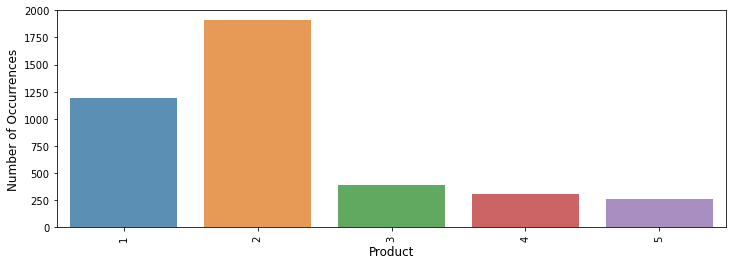

In [29]:
cnt_pro = df_mc['Feedback'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [30]:
X = df_mc['Review_new'] # the features we want to analyze
ylabels = df_mc['Feedback'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3, random_state=42)

In [31]:
pipeLR.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7fba3a7739a0>),
                ('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression(max_iter=400))])

In [32]:
y_hats_train = pipeLR.predict(X_train)
print("Training set (Multi class):")
print("    ")     
print("Logistic Regression Training Accuracy:",metrics.accuracy_score(y_train, y_hats_train))
print("Logistic Regression Training Precision:",metrics.precision_score(y_train, y_hats_train,average='weighted'))
print("Logistic Regression Training Recall:",metrics.recall_score(y_train, y_hats_train,average='weighted'))
print("Logistic Regression Training F1 score:",metrics.f1_score(y_train, y_hats_train,average='weighted'))
# Predicting with a test dataset
y_hats_test = pipeLR.predict(X_test)

# Model Accuracy
print("Test set (Multi class):")
print("    ")  
print("Test set (Multi class):")
print("    ")  
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, y_hats_test))
print("Logistic Regression Precision:",metrics.precision_score(y_test, y_hats_test,average='weighted'))
print("Logistic Regression Recall:",metrics.recall_score(y_test, y_hats_test,average='weighted'))
print("Logistic Regression F1 score:",metrics.f1_score(y_test, y_hats_test,average='weighted'))

Training set (Multi class):
    
Logistic Regression Training Accuracy: 0.825
Logistic Regression Training Precision: 0.8321359329605938
Logistic Regression Training Recall: 0.825
Logistic Regression Training F1 score: 0.8236341317075839
Test set (Multi class):
    
Test set (Multi class):
    
Logistic Regression Accuracy: 0.6247947454844006
Logistic Regression Precision: 0.6167917119590297
Logistic Regression Recall: 0.6247947454844006
Logistic Regression F1 score: 0.6162276021315033


In [33]:
pipeDT.fit(X_train, y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7fba3b7ea880>),
                ('vectorizer', CountVectorizer()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [34]:
y_hats_train = pipeDT.predict(X_train)
print("Training set (Multi class):")
print("    ") 
print("Decision Tree Training Accuracy:",metrics.accuracy_score(y_train, y_hats_train))
print("Decision Tree Training Precision:",metrics.precision_score(y_train, y_hats_train,average='weighted'))
print("Decision Tree Training Recall:",metrics.recall_score(y_train, y_hats_train,average='weighted'))
print("Decision Tree Training F1 score:",metrics.f1_score(y_train, y_hats_train,average='weighted'))

# Predicting with a test dataset
y_hats = pipeDT.predict(X_test)

# Model Accuracy
print("    ")
print("Test set (Multi class):")
print("    ") 
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_hats))
print("Decision Tree Precision:",metrics.precision_score(y_test, y_hats,average='weighted'))
print("Decision Tree Recall:",metrics.recall_score(y_test, y_hats,average='weighted'))
print("Decision Tree F1 score:",metrics.f1_score(y_test, y_hats,average='weighted'))

Training set (Multi class):
    
Decision Tree Training Accuracy: 0.6841549295774648
Decision Tree Training Precision: 0.7150479654876725
Decision Tree Training Recall: 0.6841549295774648
Decision Tree Training F1 score: 0.679073916642712
    
Test set (Multi class):
    
Decision Tree Accuracy: 0.5862068965517241
Decision Tree Precision: 0.5895781544945703
Decision Tree Recall: 0.5862068965517241
Decision Tree F1 score: 0.5749843280674121


In [35]:
pipeNB.fit(X_train, y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7fba3b7b7a60>),
                ('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB(alpha=0.1))])

In [36]:
y_hats_train = pipeNB.predict(X_train)
print("Training set (Multi class):")
print("    ") 
print("Naive Bayes Training Accuracy:",metrics.accuracy_score(y_train, y_hats_train))
print("Naive Bayes Training Precision:",metrics.precision_score(y_train, y_hats_train,average='weighted'))
print("Naive Bayes Training Recall:",metrics.recall_score(y_train, y_hats_train,average='weighted'))
print("Naive Bayes Training F1 score:",metrics.f1_score(y_train, y_hats_train,average='weighted'))

# Predicting with a test dataset
y_hats = pipeNB.predict(X_test)

# Model Accuracy
print("    ") 
print("Test set (Multi class):")
print("    ") 
print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test, y_hats))
print("Naive Bayes Precision:",metrics.precision_score(y_test, y_hats,average='weighted'))
print("Naive Bayes Recall:",metrics.recall_score(y_test, y_hats,average='weighted'))
print("Naive Bayes F1 score:",metrics.f1_score(y_test, y_hats,average='weighted'))

Training set (Multi class):
    
Naive Bayes Training Accuracy: 0.7809859154929577
Naive Bayes Training Precision: 0.786281271082571
Naive Bayes Training Recall: 0.7809859154929577
Naive Bayes Training F1 score: 0.7799637594356256
    
Test set (Multi class):
    
Naive Bayes Accuracy: 0.6272577996715928
Naive Bayes Precision: 0.6189863970302941
Naive Bayes Recall: 0.6272577996715928
Naive Bayes F1 score: 0.6213433375438437


In [37]:
classifier = SVC(kernel='linear')

# Create pipeline using Bag of Words
pipe_SVM = Pipeline([("cleaner", predictors()),
                 ('vectorizer', CountVectorizer(stop_words=None)),
                 ('classifier', classifier)])

# model generation
pipe_SVM.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7fb9fb044dc0>),
                ('vectorizer', CountVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [38]:
y_hats_train = pipe_SVM.predict(X_train)
print("Training set (Multi class):")
print("    ") 
print("SVM Training Accuracy:",metrics.accuracy_score(y_train, y_hats_train))
print("SVM  Training Precision:",metrics.precision_score(y_train, y_hats_train,average='weighted'))
print("SVM  Training Recall:",metrics.recall_score(y_train, y_hats_train,average='weighted'))
print("SVM  Training F1 score:",metrics.f1_score(y_train, y_hats_train,average='weighted'))

y_hats = pipe_SVM.predict(X_test)

# Model Accuracy
print("    ") 
print("Test set (Multi class):")
print("    ") 
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_hats))
print("SVM Precision:",metrics.precision_score(y_test, y_hats,average='weighted'))
print("SVM Recall:",metrics.recall_score(y_test, y_hats,average='weighted'))
print("SVM F1 score:",metrics.f1_score(y_test, y_hats,average='weighted'))

Training set (Multi class):
    
SVM Training Accuracy: 0.85
SVM  Training Precision: 0.856595553839527
SVM  Training Recall: 0.85
SVM  Training F1 score: 0.8497253111028917
    
Test set (Multi class):
    
SVM Accuracy: 0.5919540229885057
SVM Precision: 0.5925370738099192
SVM Recall: 0.5919540229885057
SVM F1 score: 0.5870852901078263


In [39]:
df_s_mc = pd.read_excel("/Users/sourabh/Desktop/Multi_class_score.xlsx")
df_s_mc['Review_new'] = df_s_mc['Review'].apply(lambda x: emoji_pattern.sub(r'', str(x))) 
df_s_mc.head()

,Review,Feedback,Review_new
0,Good,1,Good
1,Nice,1,Nice
2,good,1,good
3,Always kfc discontinue good product like cheez...,1,Always kfc discontinue good product like cheez...
4,Super,1,Super


In [40]:
X_s = df_s_mc['Review_new'] # the features we want to analyze
y_s = df_s_mc['Feedback']
y_LR = pipeLR.predict(X_s)
y_DT = pipeDT.predict(X_s)
y_NB = pipeNB.predict(X_s)
y_SVM = pipe_SVM.predict(X_s)

In [41]:
#Model Scoring
print(" Multi class Model Scoring:")
print(" ")
print(" Logistic Regression Accuracy:",metrics.accuracy_score(y_s, y_LR))
print(" Logistic Regression Precision:",metrics.precision_score(y_s, y_LR,average='weighted'))
print(" Logistic Regression Recall:",metrics.recall_score(y_s, y_LR,average='weighted'))
print(" Logistic Regression F1:",metrics.f1_score(y_s, y_LR,average='weighted'))
print(" ")
print(" Decision Tree Accuracy:",metrics.accuracy_score(y_s, y_DT))
print(" Decision Tree Precision:",metrics.precision_score(y_s, y_DT,average='weighted'))
print(" Decision Tree Recall:",metrics.recall_score(y_s, y_DT,average='weighted'))
print(" Decision Tree F1:",metrics.f1_score(y_s, y_DT,average='weighted'))
print(" ")
print(" Naive Bayes Accuracy:",metrics.accuracy_score(y_s, y_NB))
print(" Naive Bayes Precision:",metrics.precision_score(y_s, y_NB,average='weighted'))
print(" Naive Bayes Recall:",metrics.recall_score(y_s, y_NB,average='weighted'))
print(" Naive Bayes F1:",metrics.f1_score(y_s, y_NB,average='weighted'))
print(" ")
print(" SVM Accuracy:",metrics.accuracy_score(y_s, y_SVM))
print(" SVM Precision:",metrics.precision_score(y_s, y_SVM,average='weighted'))
print(" SVM Recall:",metrics.recall_score(y_s, y_SVM,average='weighted'))
print(" SVM F1:",metrics.f1_score(y_s, y_SVM,average='weighted'))

 Multi class Model Scoring:
 
 Logistic Regression Accuracy: 0.8477088948787062
 Logistic Regression Precision: 0.8508690351800373
 Logistic Regression Recall: 0.8477088948787062
 Logistic Regression F1: 0.8433131336901035
 
 Decision Tree Accuracy: 0.7304582210242587
 Decision Tree Precision: 0.7366963357945766
 Decision Tree Recall: 0.7304582210242587
 Decision Tree F1: 0.7215360750091945
 
 Naive Bayes Accuracy: 0.8301886792452831
 Naive Bayes Precision: 0.832276222261561
 Naive Bayes Recall: 0.8301886792452831
 Naive Bayes F1: 0.8297553283848158
 
 SVM Accuracy: 0.8477088948787062
 SVM Precision: 0.8491848775505149
 SVM Recall: 0.8477088948787062
 SVM F1: 0.8466725798193766


In [42]:


#Multi-Label classification



In [43]:
df_ML = pd.read_csv("/Users/sourabh/Desktop/graduation/EECS 5327/Project/ML_SCORE.csv")
df_ML.head()

,Review,App quality,Payment and Account,Delivery and Tracking,Food,Customer care and Service
0,There is no service for our location,0,0,1,0,0
1,Keeps on crashing 😡 Tried on all devices... .....,1,0,0,0,0
2,toooo much Netwrk issue,1,0,0,0,0
3,Barely functional. The app lacks fluidity.,1,0,0,0,0
4,Good,0,0,0,0,1


In [44]:
df_new_ML = df_ML['Review'].apply(nfx.remove_stopwords)

In [45]:
# Building features
tfidf = TfidfVectorizer()
Xfeatures = tfidf.fit_transform(df_new_ML).toarray()


In [46]:
y = df_ML[['App quality','Payment and Account','Delivery and Tracking',
       'Food','Customer care and Service']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(Xfeatures,y,test_size=0.15, random_state=42)

In [48]:
#Binary Relevance : Treats each label as a separate single classification problem
# Convert our multi label problem into multi class
binary_rel_clf = BinaryRelevance(MultinomialNB())

In [49]:
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [50]:
# Fitting the Data
br_prediction_train = binary_rel_clf.predict(X_train)
br_prediction_test = binary_rel_clf.predict(X_test)

# Converting to array
br_prediction_train = br_prediction_train.toarray()
br_prediction_test = br_prediction_test.toarray()

In [51]:
print(" Binary Relevance Training Accuracy:",accuracy_score(y_train, br_prediction_train))
print(" Binary Relevance Testing Accuracy:",accuracy_score(y_test, br_prediction_test))
print(" Binary Relevance Training Hamming loss:",hamming_loss(y_train, br_prediction_train))
print(" Binary Relevance Testing Hamming loss:",hamming_loss(y_test, br_prediction_test))

 Binary Relevance Training Accuracy: 0.7087378640776699
 Binary Relevance Testing Accuracy: 0.6666666666666666
 Binary Relevance Training Hamming loss: 0.08086807538549401
 Binary Relevance Testing Hamming loss: 0.0964401294498382


In [52]:
clf_chain_model = ClassifierChain(MultinomialNB())
clf_chain_model.fit(X_train,y_train)

ClassifierChain(classifier=MultinomialNB(), require_dense=[True, True])

In [53]:
clf_predictions_train = clf_chain_model.predict(X_train)
clf_predictions_test = clf_chain_model.predict(X_test)

In [54]:
print(" Classifier Chain Training Accuracy:",accuracy_score(y_train, clf_predictions_train))
print(" Classifier Chain Testing Accuracy:",accuracy_score(y_test, clf_predictions_test))
print(" Classifier Chain Training Hamming loss:",hamming_loss(y_train, clf_predictions_train))
print(" Classifier Chain Testing Hamming loss:",hamming_loss(y_test, clf_predictions_test))

 Classifier Chain Training Accuracy: 0.7144488863506567
 Classifier Chain Testing Accuracy: 0.6731391585760518
 Classifier Chain Training Hamming loss: 0.08332381496287836
 Classifier Chain Testing Hamming loss: 0.10064724919093851


In [55]:
clf_labelP_model = LabelPowerset(MultinomialNB())
clf_labelP_model.fit(X_train,y_train)

LabelPowerset(classifier=MultinomialNB(), require_dense=[True, True])

In [56]:
clf_labelP_predictions_train = clf_labelP_model.predict(X_train)
clf_labelP_predictions_test = clf_labelP_model.predict(X_test)

In [57]:
print(" LabelPowerset Training Accuracy:",accuracy_score(y_train, clf_labelP_predictions_train))
print(" LabelPowerset Testing Accuracy:",accuracy_score(y_test, clf_labelP_predictions_test))
print(" LabelPowerset Training Hamming loss:",hamming_loss(y_train, clf_labelP_predictions_train))
print(" LabelPowerset Testing Hamming loss:",hamming_loss(y_test, clf_labelP_predictions_test))

 LabelPowerset Training Accuracy: 0.6936036550542547
 LabelPowerset Testing Accuracy: 0.6618122977346278
 LabelPowerset Training Hamming loss: 0.10371216447744146
 LabelPowerset Testing Hamming loss: 0.1168284789644013
